# Let's make a vowel plot!
This notebook will guide you through producing a plot of vowel data. It first defines a function for easily creating vowel plots. To increase functionality for your specific goals, you can edit the function. This notebook was created by Emily Remirez, a PhD candidate in Linguistics at UC Berkeley. Her email address is eremirez@berkeley.edu, and her website is https://sites.google.com/berkeley.edu/eremirez/

## Record yourself

1. Your first step will be to make a recording of yourself saying a word with every vowel you want to plot. 
    - For example, you could read off the the sentences in the gray box in the template given in Step 3
2. Next, open those recordings in Praat and measure formants
3. Record your measurements
    - You can make a copy this template and use it to record your measurements: 
    https://docs.google.com/spreadsheets/d/1xKb4A2IEBvLBVVY4xmYTa1xca4cFMyr2nPETpUKYPfw/edit?usp=sharing
4. Save your measurements in a csv file
5. Upload that csv file to the same folder that this notebook is in

## Get the code set up

In [14]:
#Import libraries

%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from pandas import DataFrame
import seaborn as sns
import matplotlib.ticker as ticker
from matplotlib.ticker import ScalarFormatter

In [15]:
def vowelplot (vowelcsv, color="F3", title="Vowel Plot", logscale=False):
    #Set some parameters for the chart itself
    sns.set(style='ticks', context='talk')
    plt.figure(figsize=(10,10))
    
    #plot the data
    ## If your columns are named something different, be sure to change x= and y=
    ### x="yourF2Name", y="yourF1Name"
    
    if color != None:
        pl = sns.scatterplot(x="F2",y="F1",hue=color,data=vowelcsv,palette="viridis")
    else:
        pl = sns.scatterplot(x="F2",y="F1", data=vowelcsv,palette="viridis")
    
    
    #Invert axes to correlate with articulatory space!
    pl.invert_yaxis()
    pl.invert_xaxis()
    
    #Add Hz to the axis labels
    plt.ylabel("F1 (Hz)")
    plt.xlabel("F2 (Hz)")
    
    if logscale == True:
        pl.loglog()
        pl.yaxis.set_major_formatter(ticker.ScalarFormatter())
        pl.yaxis.set_minor_formatter(ticker.ScalarFormatter())
        pl.xaxis.set_major_formatter(ticker.ScalarFormatter())
        pl.xaxis.set_minor_formatter(ticker.ScalarFormatter())
    
    #Add vowel labels
    #### If your vowel column is named something different, be sure to change
    ##### vowelcsv.Vowel[line], to vowelcsv.YOURVOWELNAME[line]
    for line in range(0,vowelcsv.shape[0]):
        pl.text(vowelcsv.F2[line]+0.2, vowelcsv.F1[line], vowelcsv.Vowel[line], horizontalalignment='left',
            size='medium', color='black', weight='semibold')
    
    pl.set_title(title)
    
    return pl

## Import data
This expects a CSV file (comma separated values) with the following columns. 


It is important for the columns to be named exactly as below in order for the function defined above to work without any editing! If you used the template, you're good to go! If your columns have other names, you'll want to edit the function above; the comments (the lines with a # before them) should help you.

- F1: F1 value in Hz
- F2: F2 value in Hz
- Vowel: vowel in IPA

You may also have other values, like:
- F3: F3 value in Hz
- Token: Token number
- Speaker: Identifier of speaker


It is also fine if there are other columns not listed above in your csv! If there is another feature you want to study, you can add that as well, but you will need to edit the function defined above to use it!

### To import your data
Make sure that the name of the file is correct! The code should look like the example below, with the name of your file in quotes within the parentheses. 
```
voweldata=pd.read_csv('NameOfFile.csv')
```
My example file is called demo-vowels.

In [16]:
voweldata=pd.read_csv('demo-vowels.csv')

## Plot vowels!
You can specify what you would like color to represent in your plot by specifying the color argument. If you don't specify what color will represent, the plot will use F3 by default. Each point will have a different color from a scale indicating its relative F3. 

Some other things you might want to plot are token number, speaker, or language! Just make sure that whatever you give to the color argument is the exact same name as what's in your data.

If you want all the points to be the same color, use 
```
color=None
```

You can also add a title or change the scales of the axes to log, which is more accurate to how our ears hear sound!

```
vowelplot(voweldata, color="MY COLOR CHOICE", title="MY TITLE", logscale=True)
```

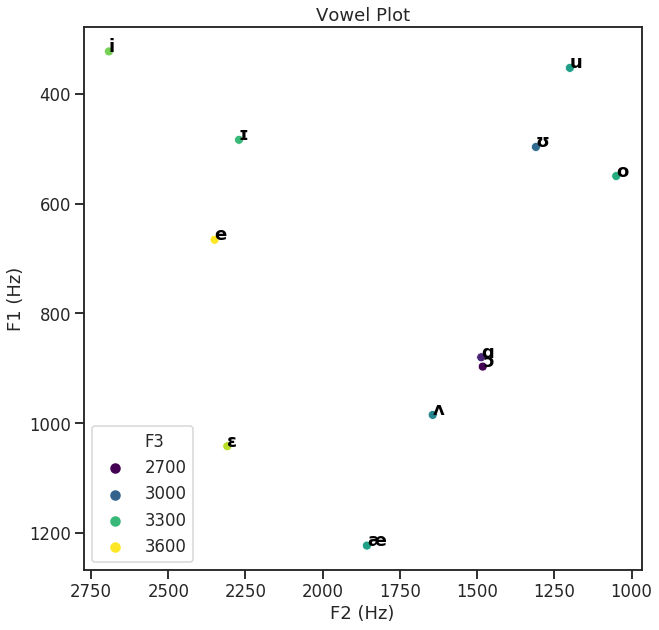

In [17]:
vowelplot(voweldata, color ="F3", logscale=False)